In [13]:
from molmap import loadmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(123)

In [14]:
aspirin = 'CC(=O)OC1=CC=CC=C1C(O)=O' #aspirin
smiles_list = [aspirin]

mp1 = loadmap('./descriptor.mp')
mp2 = loadmap('./fingerprint.mp')

In [15]:
X1 = mp1.batch_transform(smiles_list)
X2 = mp2.batch_transform(smiles_list)

100%|##########| 1/1 [00:00<00:00, 146.68it/s]


In [16]:
x1 = X1[0].sum(axis=-1)
x2 = X2[0].sum(axis=-1)

x1_rd = x1.copy()
x2_rd = x2.copy()
np.random.shuffle(x1_rd.reshape(-1,))
np.random.shuffle(x2_rd.reshape(-1,))

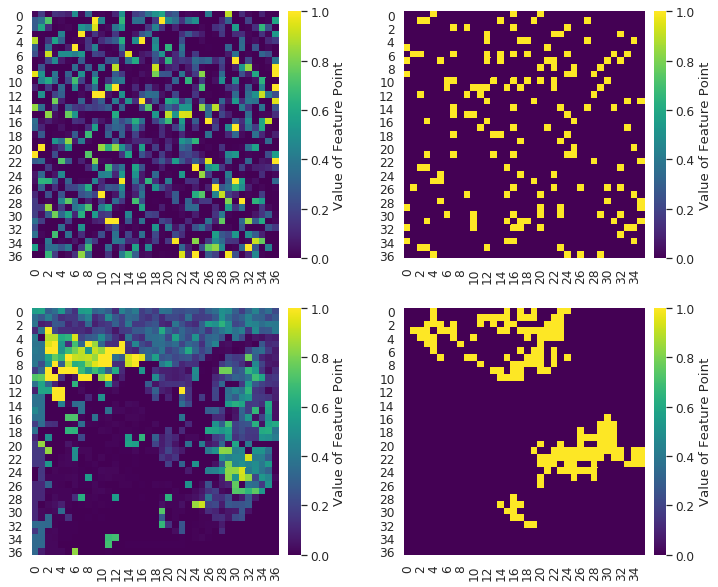

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols=2,  figsize = (12,10))
sns.set(font_scale = 1.1)
(ax1, ax2), (ax3, ax4) = ax

for x, ax in zip([x1_rd, x2_rd, x1,  x2], [ax1, ax2, ax3, ax4]):
    
    sns.heatmap(x, cmap = 'viridis',
                     square=True, vmin = 0.0, vmax = 1,
                     ax = ax,
                     annot_kws = {'size': 11},
                     cbar_kws = {'fraction':0.046, 'pad': 0.03,  'label': 'Value of Feature Point'}
                    )

plt.savefig('./images/random_and_default_arrangment.png', dpi = 400, bbox_inches ='tight')    